# Performing Analysis on Meteorological Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Libraries imported successfully!")

Libraries imported successfully!


Loading the dataset

In [2]:
data = pd.read_csv("WeatherHistory.csv")

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<h5><u>Exploring the data</u></h5>

Count all the attributes

In [4]:
data.count()

Formatted Date              96453
Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [5]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Checking null values

In [6]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Here we can see there are 517 null values in Precip Type

Checking all unique Values

In [7]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Date time breaking down

In [10]:
data[["Date-Time","TZ"]]=data["Formatted Date"].str.split("+",expand=True)
df=data.drop(columns="Formatted Date")

In [11]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date-Time,TZ
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [12]:
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df1=df.reindex(columns=columns_order)
df2=df1.drop(columns="TZ")

In [13]:
df2.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
df2["Date-Time"]=pd.to_datetime(df2["Date-Time"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date-Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  float64       
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                96453 non-null  float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
dtypes: datetime64[ns](

Adding Year, Month, Day attributes to the table to analysis pricisely

In [15]:
df2["Year"]=pd.DatetimeIndex(df2["Date-Time"]).year
df2["Month"]=df2["Date-Time"].dt.month_name()
df2["day"]=df2["Date-Time"].dt.day
df2.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1


<h5><u>Data Analysis</u></h5>

=> Wind Speed Analysis

<br>

In [16]:
df2["Wind Speed (km/h)"].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

Average Wind Speed for last 10 year data analysis

In [17]:
avg_wind_Speed=pd.DataFrame(df2.groupby("Year")["Wind Speed (km/h)"].mean())
avg_wind_Speed

,Wind Speed (km/h)
Year,
2006,10.189852
2007,10.825392
2008,11.303897
2009,11.505948
2010,11.015628
2011,9.898262
2012,11.264545
2013,10.969389
2014,10.502473


Text(0.5, 1.0, 'Average wind speed over the yeears')

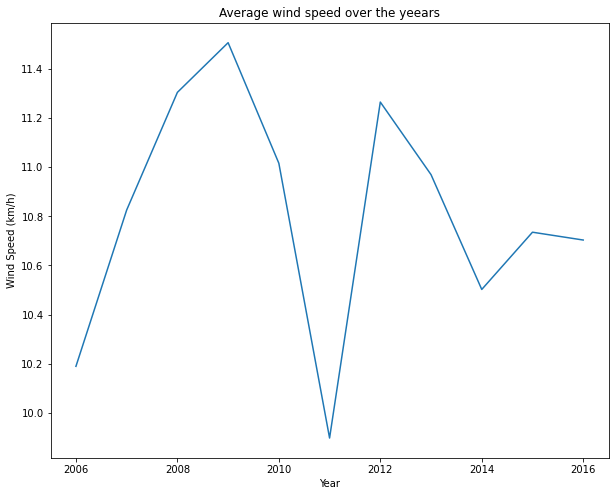

In [18]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=avg_wind_Speed.index,y=avg_wind_Speed["Wind Speed (km/h)"])
plt.title("Average wind speed over the yeears")

Monthly Average wind Speed

In [19]:
month_avg_wind_Speed=pd.DataFrame(df2.groupby("Month")["Wind Speed (km/h)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_wind_speed=month_avg_wind_Speed.reindex(index=order)
monthly_wind_speed

,Wind Speed (km/h)
Month,
January,11.512816
February,12.185543
March,13.405461
April,11.893094
May,10.959337
June,9.626471
July,9.639907
August,8.933431
September,9.621813


Monthly Average wind speed over the year

Text(0.5, 1.0, 'Monthly Average wind speed over the yeears')

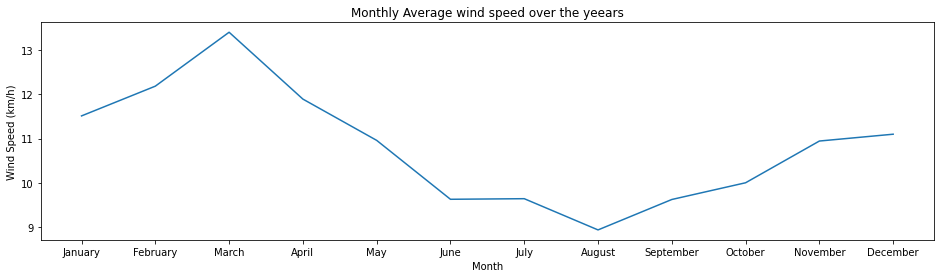

In [20]:
fig,ax=plt.subplots(figsize=(16,4))
sns.lineplot(x=monthly_wind_speed.index,y=monthly_wind_speed["Wind Speed (km/h)"])
plt.title("Monthly Average wind speed over the yeears")

=> Humidity

In [21]:
df2["Humidity"].describe()

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

In [22]:
avg_humidity=pd.DataFrame(df2.groupby("Year")["Humidity"].mean())
avg_humidity

,Humidity
Year,
2006,0.767341
2007,0.689652
2008,0.701237
2009,0.707247
2010,0.796858
2011,0.736017
2012,0.689500
2013,0.754209
2014,0.748578


Text(0.5, 1.0, 'Average Humidity over the yeears')

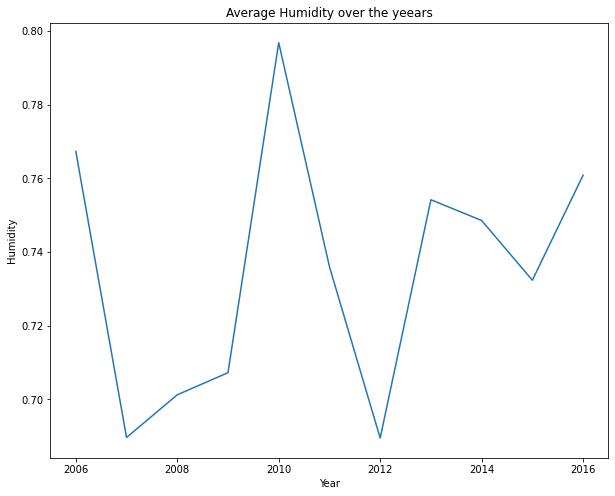

In [23]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=avg_humidity.index,y=avg_humidity["Humidity"])
plt.title("Average Humidity over the yeears")

Monthly average Humidity

In [24]:
month_avg_humidity=pd.DataFrame(df2.groupby("Month")["Humidity"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_humidity=month_avg_humidity.reindex(index=order)
monthly_humidity

,Humidity
Month,
January,0.850723
February,0.813400
March,0.702966
April,0.641133
May,0.691325
June,0.686470
July,0.639657
August,0.635542
September,0.688790


Text(0.5, 1.0, 'Monthly Average Humidity over the yeears')

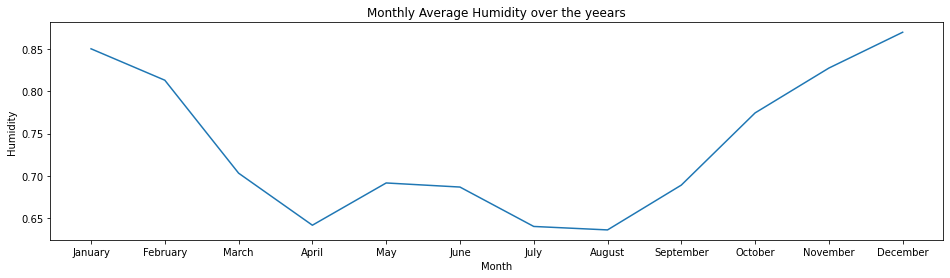

In [25]:
fig,ax=plt.subplots(figsize=(16,4))
sns.lineplot(x=monthly_humidity.index,y=monthly_humidity["Humidity"])
plt.title("Monthly Average Humidity over the yeears")

=> Weather Condition Analysis

In [26]:
df2["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Most Frequent Weather

In [27]:
weather_condition=pd.DataFrame(df2.groupby("Year")["Summary"].describe(include="O").top)

weather_condition.rename(columns={"top":"most frequent weather"})

,most frequent weather
Year,
2006,Partly Cloudy
2007,Partly Cloudy
2008,Partly Cloudy
2009,Partly Cloudy
2010,Partly Cloudy
2011,Partly Cloudy
2012,Partly Cloudy
2013,Partly Cloudy
2014,Mostly Cloudy


In [28]:
monthly_weather_condition=pd.DataFrame(df2.groupby("Month")["Summary"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_weather_condition.rename(columns={"top":"most frequent weather"})
monthly=monthly_weather_condition.reindex(index=order)
monthly

,top
Month,
January,Overcast
February,Overcast
March,Mostly Cloudy
April,Partly Cloudy
May,Partly Cloudy
June,Partly Cloudy
July,Partly Cloudy
August,Partly Cloudy
September,Partly Cloudy


=> Visibility Analysis

Monthly Average Visibility

In [29]:
month_avg_visibility=pd.DataFrame(df2.groupby("Month")["Visibility (km)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_visibility=month_avg_visibility.reindex(index=order)
monthly_visibility

,Visibility (km)
Month,
January,7.830584
February,8.731368
March,10.910450
April,11.784224
May,11.892754
June,11.990266
July,12.187820
August,12.455549
September,11.602874


Monthly visibility over the years

Text(0.5, 1.0, 'Monthly visibility over the yeears')

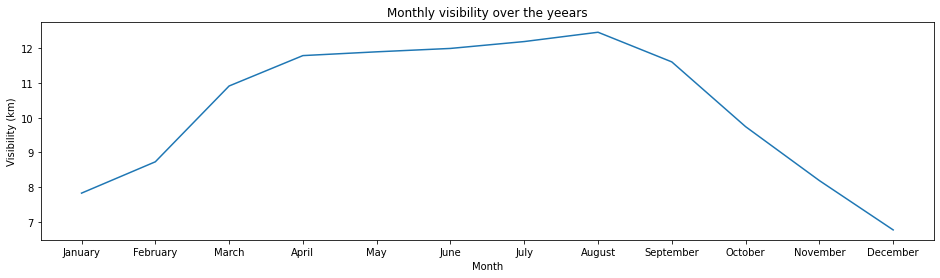

In [30]:
fig,ax=plt.subplots(figsize=(16,4))
sns.lineplot(x=monthly_visibility.index,y=monthly_visibility["Visibility (km)"])
plt.title("Monthly visibility over the yeears")

Here we see minimum visibility was remain in December while mostly visible in August

=> Precipitation

In [31]:
percip=pd.DataFrame(df2.groupby("Month")["Precip Type"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_p=percip.rename(columns={"top":"Precip Type"})
monthly_percip=m_p.reindex(index=order)
monthly_percip

,Precip Type
Month,
January,rain
February,rain
March,rain
April,rain
May,rain
June,rain
July,rain
August,rain
September,rain


=> Temperature

Text(0, 0.5, 'freq')

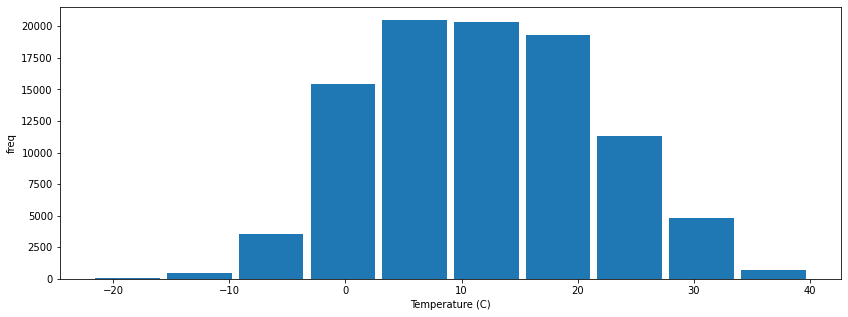

In [32]:
fig,ax=plt.subplots(figsize=(14,5))
plt.hist(df2["Temperature (C)"],bins=10,rwidth=0.9)
plt.xlabel("Temperature (C)")
plt.ylabel("freq")

Average Temperature over the years

In [33]:
year_avg_temp=pd.DataFrame(df2.groupby("Year")["Temperature (C)"].mean())
year_avg_temp

,Temperature (C)
Year,
2006,11.215365
2007,12.135239
2008,12.161876
2009,12.267910
2010,11.202061
2011,11.524453
2012,11.986726
2013,11.940719
2014,12.529737


Text(0.5, 1.0, 'Annual average temperature')

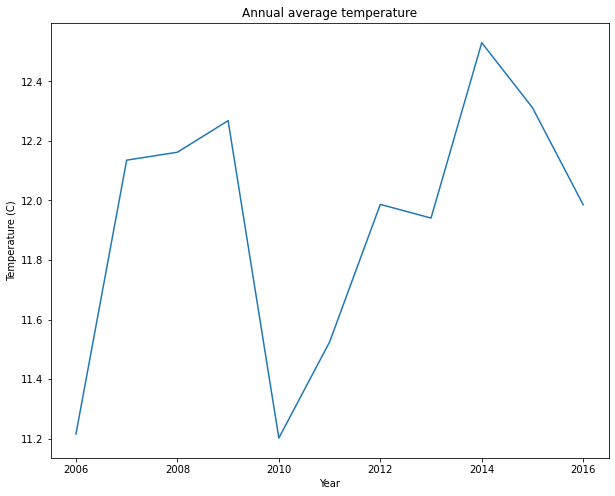

In [34]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=year_avg_temp.index,y=year_avg_temp["Temperature (C)"])
plt.title("Annual average temperature")

In [35]:
month_temp=pd.DataFrame(df2.groupby("Month")["Temperature (C)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]

monthly_avg_temp=month_temp.reindex(index=order)
monthly_avg_temp

,Temperature (C)
Month,
January,0.813890
February,2.159699
March,6.906599
April,12.756417
May,16.873692
June,20.715617
July,22.963943
August,22.345031
September,17.516790


Monthly Average Temperature

Text(0.5, 1.0, 'monthly average temperature')

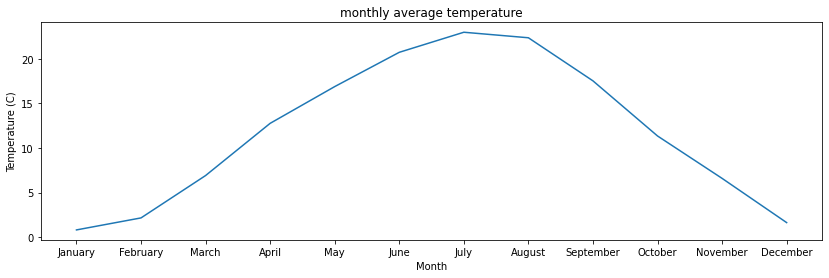

In [36]:
fig,ax=plt.subplots(figsize=(14,4))
sns.lineplot(x=monthly_avg_temp.index,y=monthly_avg_temp["Temperature (C)"])
plt.title("monthly average temperature")

=> Pressure Analysis

In [37]:
df2["Pressure (millibars)"].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [38]:
avg_pressure=pd.DataFrame(df2.groupby("Year")["Pressure (millibars)"].mean())
avg_pressure

,Pressure (millibars)
Year,
2006,992.543529
2007,1001.640226
2008,1007.734504
2009,1002.608735
2010,1004.811891
2011,1014.184075
2012,999.341481
2013,1004.950764
2014,987.394676


Text(0.5, 1.0, 'Average Pressure over the yeears')

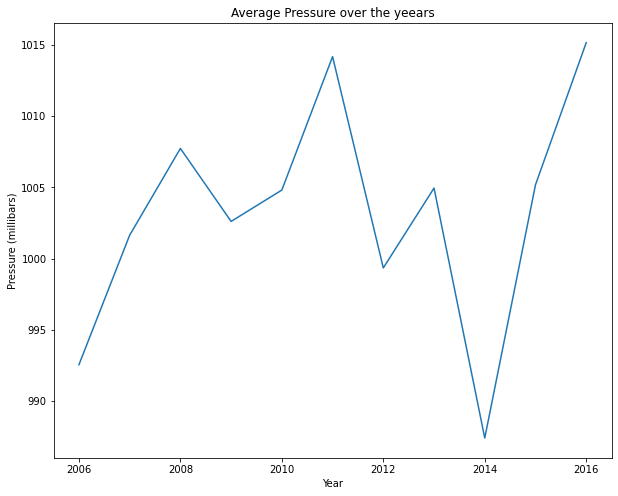

In [39]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=avg_pressure.index,y=avg_pressure["Pressure (millibars)"])
plt.title("Average Pressure over the yeears")

In [40]:
month_avg_pressure=pd.DataFrame(df2.groupby("Month")["Pressure (millibars)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_pressure=month_avg_pressure.reindex(index=order)
monthly_pressure

,Pressure (millibars)
Month,
January,1006.125792
February,1003.929313
March,1001.551536
April,1009.996332
May,1003.499530
June,1001.883742
July,1008.566431
August,1001.716944
September,1000.565347


Text(0.5, 1.0, 'Monthly Average Pressure over the yeears')

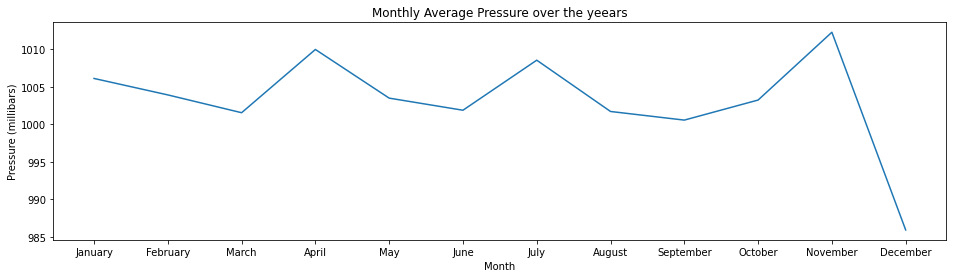

In [41]:
fig,ax=plt.subplots(figsize=(16,4))
sns.lineplot(x=monthly_pressure.index,y=monthly_pressure["Pressure (millibars)"])
plt.title("Monthly Average Pressure over the yeears")

=> Correlation

In [42]:
df3=df2.drop(columns=["Year","day","Loud Cover"])
df3_corr=df3.corr()
df3_corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


Text(0.5, 1.0, 'correlations heat map')

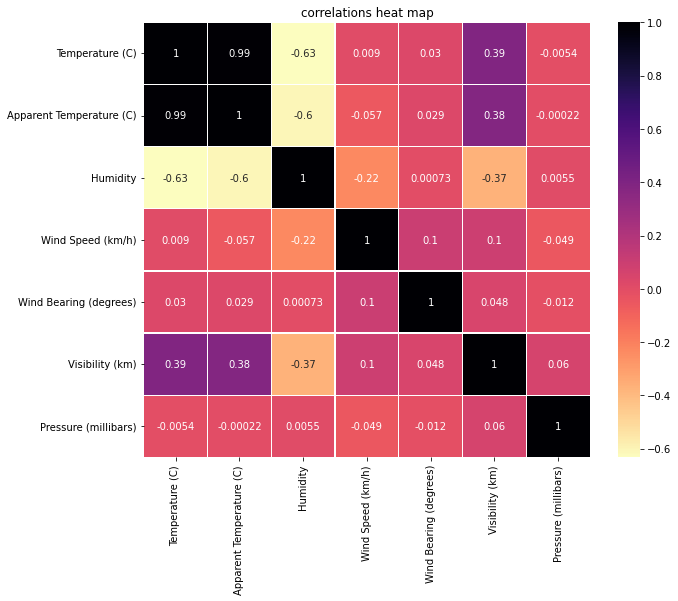

In [43]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df3_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")

Loading again dataset to analyze Apparent temperature

In [44]:
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Formatting date and time according to UTC

In [45]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

set up UTC Formatted date time 

In [46]:
data = data.set_index('Formatted Date')
data.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


After resampling mean of monthly apparent temprature and humidity

In [47]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Variation plot in Apparent Temperature and Humidity with time

<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

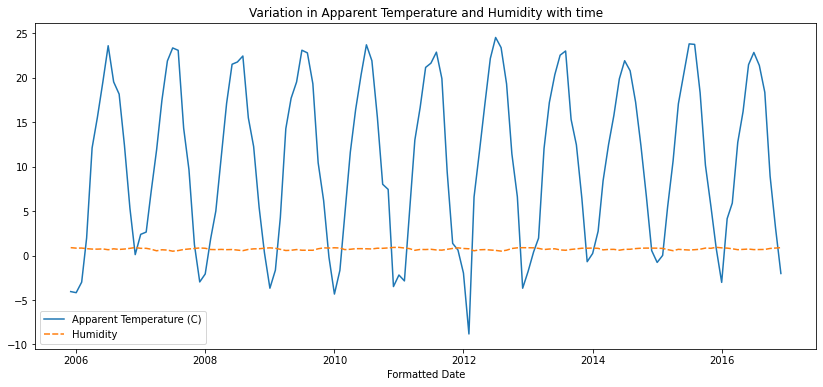

In [48]:
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

Here we can analyze that humidity did'nt change much over the time of 10 years as temperature

Relation between Apparent temp. and humidity

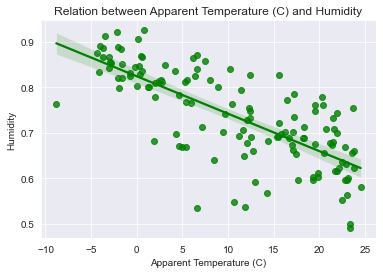

In [49]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

Retrieving the data of a particular month from every year, we can say Janurary

In [50]:
df1 = df_monthly_mean[df_monthly_mean.index.month==1]
print(df1)

df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2007-01-01 00:00:00+00:00                  2.387015  0.813495
2008-01-01 00:00:00+00:00                 -2.069907  0.819476
2009-01-01 00:00:00+00:00                 -3.669937  0.867621
2010-01-01 00:00:00+00:00                 -4.329062  0.875914
2011-01-01 00:00:00+00:00                 -2.186813  0.922030
2012-01-01 00:00:00+00:00                 -1.965211  0.797581
2013-01-01 00:00:00+00:00                 -1.768578  0.883105
2014-01-01 00:00:00+00:00                  0.234536  0.846169
2015-01-01 00:00:00+00:00                 -0.770124  0.831519
2016-01-01 00:00:00+00:00                 -3.014576  0.866156


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<br>

Plotting each year tempreature and humidity changes

Text(0.5, 0, 'Month of April')

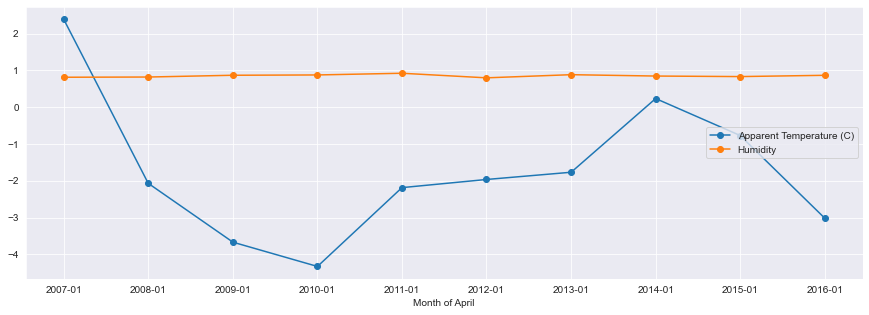

In [51]:
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

Here we see that humidity changes remained same in last 10 years while temperature change minimum in 2010 and maximum in 2007 in the month of April in last 10 years.